In [6]:
import re
import pandas as pd

In [7]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model


# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
text_file = open("health_words.txt", "r", encoding="utf8")
lines = text_file.readlines()

print(len(lines))

for i in range (0,len(lines)):
    lines[i] = lines[i].replace('\n','')
    
print(lines)

text_file.close()

4443
['abceso', 'abdomen', 'abdominal', 'abdominales', 'abducción', 'abductores', 'abertura', 'aberturas', 'abortadora', 'aborto', 'abortus', 'abrasión', 'abscedens', 'absceso', 'abscesos', 'abstinencia', 'abuso', 'acalasia', 'acantamebiasis', 'acantolítica', 'acantolítico', 'acantolíticos', 'acantosis', 'acariasis', 'accidente', 'accidentes', 'acetábulo', 'acetonuria', 'ácidas', 'acidez', 'acidificantes', 'acido', 'ácido', 'ácido-básico', 'acidos', 'ácidos', 'acidosis', 'acné', 'acnés', 'acondicionador', 'acondrogénesis', 'acondroplasia', 'acreciones', 'acrodermatitis', 'acromegalia', 'acromioclavicular', 'actínica', 'actínico', 'actinomicetoma', 'actinomicosis', 'actinomicótica', 'acuático', 'acústico', 'ada', 'addisoniana', 'adenoides', 'adenomatosa', 'adenomegalia', 'adenosina', 'adenovirus', 'adictivas', 'adiestramiento', 'adiposidad', 'adiposo', 'adn', 'adrenérgicos', 'adrenocortical', 'adrenogenital', 'adrenogenitales', 'aductor', 'aeróbicas', 'aerostático', 'aeruginosa', 'afaqu

In [9]:
df = pd.read_csv('total_news.csv')


print(df.info())
print(df['1'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258396 entries, 0 to 258395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    258396 non-null  int64 
 1   Unnamed: 0.1  258396 non-null  int64 
 2   0             258396 non-null  object
 3   1             258396 non-null  object
 4   2             258396 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.9+ MB
None
0         https://elcomercio.pe/luces/cine/star-wars-the...
1         https://elcomercio.pe/lima/sucesos/bomberos-re...
2         https://elcomercio.pe/mundo/eeuu/nueva-york-tu...
3         https://elcomercio.pe/peru/policia-decomiso-ce...
4         https://elcomercio.pe/mundo/latinoamerica/vene...
                                ...                        
258391    https://elcomercio.pe/tecnologia/ciencias/ano-...
258392    https://elcomercio.pe/opinion/columnistas/las-...
258393    https://elcomercio.pe/opinion/efemerides/192

In [10]:

forbiddenwords = re.compile('/peru/|/lima/|/tecnologia/') 

rnews = []
for n in range (len(df['1'])):
    if forbiddenwords.search(df['1'][n]):
        rnews.append(n)
        print(df['1'][n])
        
filtered_news = df.iloc[rnews]
filtered_news.to_csv("filtered_news.csv")


Se han truncado las últimas 5000 líneas del flujo de salida.
https://elcomercio.pe/peru/ayacucho-camion-llevaba-74-kg-de-marihuana-ocultos-dentro-de-sacos-de-papas-nnpp-noticia/
https://elcomercio.pe/peru/coronavirus-peru-en-vivo-cifras-oficiales-del-minsa-noticias-casos-y-muertos-por-covid-19-hoy-sabado-26-de-setiembre-2020-dia-195-del-estado-de-emergencia-ministerio-de-salud-pandemia-minsa-pilar-mazzetti-noticia/
https://elcomercio.pe/lima/sucesos/coronavirus-en-peru-minsa-reporta-que-657836-pacientes-se-recuperaron-del-covid-19-y-fueron-dados-de-alta-nndc-noticia/
https://elcomercio.pe/peru/trujillo-municipalidad-provincial-recogio-2500-toneladas-de-residuos-en-septiembre-nnpp-noticia/
https://elcomercio.pe/lima/sucesos/el-agustino-el-nuevo-puente-peatonal-malecon-checa-y-las-luces-ornamentales-que-lo-adornan-fotos-nndc-noticia/
https://elcomercio.pe/lima/sucesos/pilar-mazzetti-la-unica-forma-de-salir-lo-mejor-librado-posible-de-la-pandemia-es-no-bajar-la-guardia-nndc-noticia/
https

In [11]:
noticias = []
for n in range (len(rnews)):
    res = re.sub('[^A-Za-zá-ú ]+', '', df["0"][rnews[n]]).split(' ')
    for i in res:
        if i in lines:
            print(i)
           
            noticias.append(rnews[n])
            break
        

Se han truncado las últimas 5000 líneas del flujo de salida.
muestras
virus
coronavirus
falleció
vacuna
hospital
emergencia
coronavirus
virus
salud
coronavirus
tratamientos
emergencia
emergencia
coronavirus
muerte
psicológicos
anticuerpos
coronavirus
muertos
coronavirus
contagios
coronavirus
muertos
rotura
virus
coronavirus
coronavirus
enfermedad
paciente
paciente
muertos
físicos
sangre
infectados
infectados
infectada
emergencia
diagnóstico
virus
hospital
inmune
fallecidos
muertos
coronavirus
económicas
laboratorio
sangre
infectados
contagio
coronavirus
coronavirus
hantavirus
rosada
emergencia
hospital
coronavirus
coronavirus
paciente
coronavirus
coronavirus
infectado
preocupación
emergencia
fallecidos
coronavirus
coronavirus
hospital
coronavirus
coronavirus
mantenimiento
salud
médico
sangre
contagio
coronavirus
cuchillo
contacto
emergencia
coronavirus
emergencia
tratamiento
médica
tratamiento
coronavirus
zika
anosmia
virus
emergencia
contagio
fallecidos
coronavirus
emergencia
fallecid

In [12]:
clasified_news = df.iloc[noticias]
print(clasified_news)
clasified_news.to_csv("clasified_news.csv")

        Unnamed: 0  ...           2
17              17  ...  2018-01-01
25              25  ...  2018-01-01
69              69  ...  2018-01-01
129            129  ...  2018-01-02
132            132  ...  2018-01-02
...            ...  ...         ...
258321      258321  ...  2021-01-01
258324      258324  ...  2021-01-01
258327      258327  ...  2021-01-01
258330      258330  ...  2021-01-01
258339      258339  ...  2021-01-01

[12694 rows x 5 columns]


In [13]:
list_idx = clasified_news['Unnamed: 0'].tolist()
print(list_idx)

[17, 25, 69, 129, 132, 174, 200, 207, 241, 285, 288, 289, 291, 298, 307, 349, 404, 414, 434, 438, 445, 448, 479, 488, 495, 498, 499, 517, 530, 535, 564, 567, 578, 581, 594, 600, 609, 613, 614, 617, 624, 657, 659, 683, 710, 713, 719, 744, 746, 748, 765, 775, 799, 803, 817, 835, 837, 850, 877, 878, 880, 881, 883, 887, 937, 961, 1015, 1021, 1022, 1027, 1028, 1031, 1032, 1056, 1065, 1076, 1078, 1107, 1108, 1122, 1138, 1145, 1170, 1182, 1198, 1212, 1299, 1311, 1399, 1426, 1427, 1439, 1455, 1471, 1514, 1518, 1520, 1550, 1563, 1585, 1616, 1633, 1641, 1652, 1663, 1708, 1734, 1751, 1782, 1812, 1822, 1828, 1829, 1860, 1891, 1903, 1908, 1947, 1985, 2062, 2148, 2153, 2160, 2188, 2193, 2219, 2231, 2284, 2335, 2355, 2358, 2370, 2412, 2477, 2486, 2599, 2608, 2609, 2612, 2666, 2676, 2689, 2694, 2700, 2712, 2714, 2788, 2789, 2796, 2799, 2820, 2903, 2959, 2962, 3014, 3039, 3093, 3115, 3145, 3188, 3228, 3244, 3257, 3284, 3285, 3299, 3309, 3390, 3396, 3400, 3415, 3446, 3468, 3504, 3508, 3513, 3563, 3572, 

In [14]:
df['health'] = '1'
print(df)
df.health=df.health.where(df['Unnamed: 0'].isin(list_idx),'0')

df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df = df.rename(columns = {'0': 'heading','2': 'date', '1': 'url'}, inplace = False)

print(df)
df.to_csv("train.csv")

        Unnamed: 0  Unnamed: 0.1  ...           2 health
0                0             0  ...  2018-01-01      1
1                1             1  ...  2018-01-01      1
2                2             2  ...  2018-01-01      1
3                3             3  ...  2018-01-01      1
4                4             4  ...  2018-01-01      1
...            ...           ...  ...         ...    ...
258391      258391           184  ...  2021-01-01      1
258392      258392           185  ...  2021-01-01      1
258393      258393           186  ...  2021-01-01      1
258394      258394           187  ...  2021-01-01      1
258395      258395           188  ...  2021-01-01      1

[258396 rows x 6 columns]


2021-06-21 19:19:13,811 : INFO : NumExpr defaulting to 2 threads.


                                                  heading  ... health
0       "Star Wars: The Last Jedi" ya recaudó más de U...  ...      0
1       Bomberos registraron más de 170 emergencias en...  ...      0
2       Nueva York tuvo la menor tasa de homicidios de...  ...      0
3       Policía decomisó cerca de 54 mil kilos de drog...  ...      0
4       Nicolás Maduro aumenta en 40% el salario mínim...  ...      0
...                                                   ...  ...    ...
258391  Por qué el año no termina realmente a la media...  ...      0
258392           Las fuerzas del mercado, por Iván Alonso  ...      0
258393                                  1921: Año difícil  ...      0
258394  “Cobra Kai” temporada 3 ya está disponible en ...  ...      0
258395  Apple desarrolla un teclado dinámico para MacB...  ...      0

[258396 rows x 4 columns]


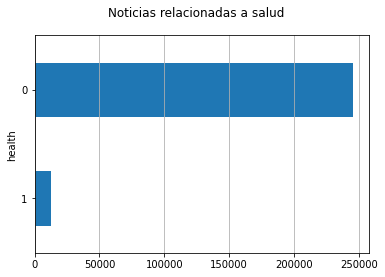

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots()
fig.suptitle("Noticias relacionadas a salud", fontsize=12)
df["health"].reset_index().groupby("health").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [16]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and   characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [17]:
!pip install nltk
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
lst_stopwords = nltk.corpus.stopwords.words("spanish")
lst_stopwords


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [19]:

df["text_clean"] = df["heading"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
df.head()

,heading,url,date,health,text_clean
0,"""Star Wars: The Last Jedi"" ya recaudó más de U...",https://elcomercio.pe/luces/cine/star-wars-the...,2018-01-01,0,star war the last jedi recaudó us1000 millones
1,Bomberos registraron más de 170 emergencias en...,https://elcomercio.pe/lima/sucesos/bomberos-re...,2018-01-01,0,bomberos registraron 170 emergencias lima callao
2,Nueva York tuvo la menor tasa de homicidios de...,https://elcomercio.pe/mundo/eeuu/nueva-york-tu...,2018-01-01,0,nueva york menor tasa homicidios ii guerra mun...
3,Policía decomisó cerca de 54 mil kilos de drog...,https://elcomercio.pe/peru/policia-decomiso-ce...,2018-01-01,0,policía decomisó cerca 54 mil kilo droga 2017
4,Nicolás Maduro aumenta en 40% el salario mínim...,https://elcomercio.pe/mundo/latinoamerica/vene...,2018-01-01,0,nicolás maduro aumenta 40 salario mínimo 2018


In [20]:
df = df[['heading', 'url', 'date', 'text_clean', 'health']]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258396 entries, 0 to 258395
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   heading     258396 non-null  object
 1   url         258396 non-null  object
 2   date        258396 non-null  object
 3   text_clean  258396 non-null  object
 4   health      258396 non-null  object
dtypes: object(5)
memory usage: 9.9+ MB
None


In [21]:
from sklearn.model_selection import train_test_split
TRAIN_SIZE = 0.8
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print(df_train.iloc[0])
print("TEST size:", len(df_test))

TRAIN size: 206716
heading       El humanitarismo americanista del Gran Almiran...
url           https://elcomercio.pe/mundo/actualidad/el-huma...
date                                                 2020-10-08
text_clean    humanitarismo americanista gran almirante migu...
health                                                        0
Name: 236738, dtype: object
TEST size: 51680


W2V

In [22]:
# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10
import gensim

In [23]:
%%time
documents = [_text.split() for _text in df_train.text_clean] 
print(len(documents))

206716
CPU times: user 465 ms, sys: 115 ms, total: 580 ms
Wall time: 579 ms


In [24]:
#w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE,  window=W2V_WINDOW,  min_count=W2V_MIN_COUNT, workers=8)
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=documents, size=W2V_SIZE, window=W2V_WINDOW, min_count=W2V_MIN_COUNT, workers=4)

2021-06-21 19:19:43,321 : INFO : collecting all words and their counts
2021-06-21 19:19:43,328 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-06-21 19:19:43,355 : INFO : PROGRESS: at sentence #10000, processed 80604 words, keeping 17546 word types
2021-06-21 19:19:43,395 : INFO : PROGRESS: at sentence #20000, processed 161519 words, keeping 25135 word types
2021-06-21 19:19:43,424 : INFO : PROGRESS: at sentence #30000, processed 242607 words, keeping 30484 word types
2021-06-21 19:19:43,451 : INFO : PROGRESS: at sentence #40000, processed 323334 words, keeping 34903 word types
2021-06-21 19:19:43,478 : INFO : PROGRESS: at sentence #50000, processed 404198 words, keeping 38640 word types
2021-06-21 19:19:43,506 : INFO : PROGRESS: at sentence #60000, processed 484753 words, keeping 42049 word types
2021-06-21 19:19:43,540 : INFO : PROGRESS: at sentence #70000, processed 565298 words, keeping 45008 word types
2021-06-21 19:19:43,569 : INFO : PROGRESS: at s

In [25]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2021-06-21 19:20:08,759 : WARNING : Effective 'alpha' higher than previous training cycles
2021-06-21 19:20:08,761 : INFO : training model with 4 workers on 16021 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2021-06-21 19:20:09,791 : INFO : EPOCH 1 - PROGRESS: at 21.53% examples, 318038 words/s, in_qsize 7, out_qsize 0
2021-06-21 19:20:10,807 : INFO : EPOCH 1 - PROGRESS: at 44.91% examples, 330493 words/s, in_qsize 4, out_qsize 3
2021-06-21 19:20:11,813 : INFO : EPOCH 1 - PROGRESS: at 68.89% examples, 338646 words/s, in_qsize 6, out_qsize 1
2021-06-21 19:20:12,870 : INFO : EPOCH 1 - PROGRESS: at 92.84% examples, 338487 words/s, in_qsize 7, out_qsize 0
2021-06-21 19:20:13,043 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-06-21 19:20:13,085 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-06-21 19:20:13,105 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-06-21 19:20:13,110 : INFO : w

CPU times: user 4min 13s, sys: 1.54 s, total: 4min 14s
Wall time: 2min 16s


(47731904, 53413088)

In [26]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 16021


In [27]:
w2v_model.wv.most_similar("accidente")

2021-06-21 19:22:24,958 : INFO : precomputing L2-norms of word weight vectors


[('volcadura', 0.5400617122650146),
 ('despiste', 0.5239934921264648),
 ('choque', 0.4872763156890869),
 ('vuelco', 0.4649057388305664),
 ('derrumbe', 0.44936537742614746),
 ('estrellarse', 0.4351671040058136),
 ('motociclista', 0.43267202377319336),
 ('chocar', 0.4191854000091553),
 ('ataque', 0.41339123249053955),
 ('chofer', 0.41156014800071716)]

In [28]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text_clean)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 71672
CPU times: user 4.09 s, sys: 141 ms, total: 4.23 s
Wall time: 4.17 s


In [29]:

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024



In [30]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text_clean), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text_clean), maxlen=SEQUENCE_LENGTH)


CPU times: user 5.64 s, sys: 278 ms, total: 5.91 s
Wall time: 5.85 s


In [31]:
labels = df_train.health.unique().tolist()
labels

['0', '1']

In [32]:
encoder = LabelEncoder()
encoder.fit(df_train.health.tolist())

y_train = encoder.transform(df_train.health.tolist())
y_test = encoder.transform(df_test.health.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (206716, 1)
y_test (51680, 1)


In [33]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (206716, 300)
y_train (206716, 1)

x_test (51680, 300)
y_test (51680, 1)


In [34]:
y_train[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [35]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(71672, 300)


In [36]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [37]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          21501600  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 21,662,101
Trainable params: 160,501
Non-trainable params: 21,501,600
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [39]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [40]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/8
182/182 [==============================] - 2398s 13s/step - loss: 0.2453 - accuracy: 0.9141 - val_loss: 0.1156 - val_accuracy: 0.9577
Epoch 2/8
182/182 [==============================] - 2310s 13s/step - loss: 0.1233 - accuracy: 0.9556 - val_loss: 0.0981 - val_accuracy: 0.9637
Epoch 3/8
182/182 [==============================] - 2356s 13s/step - loss: 0.1104 - accuracy: 0.9603 - val_loss: 0.0925 - val_accuracy: 0.9666
Epoch 4/8
182/182 [==============================] - 2430s 13s/step - loss: 0.1074 - accuracy: 0.9610 - val_loss: 0.0892 - val_accuracy: 0.9671
Epoch 5/8
182/182 [==============================] - 2617s 14s/step - loss: 0.1015 - accuracy: 0.9629 - val_loss: 0.0879 - val_accuracy: 0.9680
Epoch 6/8
182/182 [==============================] - 2529s 14s/step - loss: 0.0970 - accuracy: 0.9645 - val_loss: 0.0860 - val_accuracy: 0.9688
Epoch 7/8
182/182 [==============================] - 2513s 14s/step - loss: 0.0930 - accuracy: 0.9668 - val_loss: 0.0848 - val_accuracy:

In [41]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

51/51 [==============================] - 131s 3s/step - loss: 0.0870 - accuracy: 0.9679

ACCURACY: 0.9679179787635803
LOSS: 0.08704965561628342
CPU times: user 3min 58s, sys: 14.2 s, total: 4min 12s
Wall time: 2min 23s


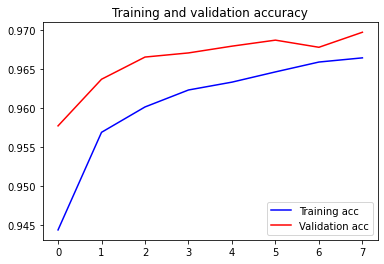

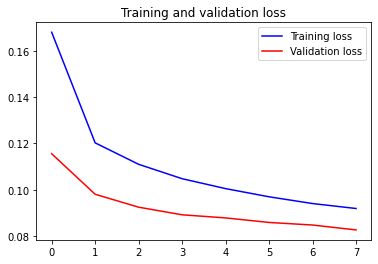

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [46]:
# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"


model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

2021-06-22 00:51:50,314 : INFO : saving Word2Vec object under model.w2v, separately None
2021-06-22 00:51:50,321 : INFO : not storing attribute vectors_norm
2021-06-22 00:51:50,324 : INFO : not storing attribute cum_table
2021-06-22 00:51:50,910 : INFO : saved model.w2v


In [95]:
def decode_sentiment(score, include_neutral=True):
      if score < 0.3 :
        #print("NEGATIVE") 
        return "NEGATIVE"
      else: 
        #print("POSITIVE")
        return "POSITIVE"

In [101]:
import time

def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    #return {"label": label, "score": float(score),"elapsed_time": time.time()-start_at}  
    return label, float(score)

In [102]:
predict("Cáncer de pulmón aumenta en el peru")

('POSITIVE', 0.7705700397491455)

In [103]:
predict("Inglaterra vs República Checa EN VIVO: se enfrentan en Wembley por el grupo D de la Eurocopa 2021")

('NEGATIVE', 0.00011702750634867698)

In [111]:
predict_data = pd.read_excel('2021-01-01_2021-02-01.xlsx', index_col=0)  
#print(predict_data["Titular"])



new_predicted = pd.DataFrame( predict_data["Titular"])

new_predicted["SALUD"] = ""
new_predicted["score"] = ""



print(type(new_predicted))
print(len(new_predicted["Titular"]))

for i in range(0, len(new_predicted["Titular"])):
  #print(i)
  str1 = str(new_predicted["Titular"][i])
  #print(str1)
  label, score= predict(str1)
  print(label)
  new_predicted["SALUD"][i] = label
  new_predicted["score"][i] = str(score)


print(new_predicted)

<class 'pandas.core.frame.DataFrame'>
4724
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
POSITIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
POSITIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEGATIVE
NEG

In [112]:
new_predicted.to_excel("noticias_clasificadas.xlsx") 